In [297]:
pip install category_encoders

Active code page: 65001
Note: you may need to restart the kernel to use updated packages.


In [310]:
pip install graphviz

Active code page: 65001
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import category_encoders as ce
import graphviz 

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

import warnings
warnings.filterwarnings('ignore')

In [4]:
#PART I
#Task 1
#Load iris data into 'myiris' dataframe 
myiris = pd.read_excel('Iris.xlsx') 
nrow, ncol = myiris.shape
predictors = myiris.iloc[:, :ncol - 1]
target = myiris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(predictors, target,  test_size=.3)
DTC = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 4, random_state = 27)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

[[12  0  0]
 [ 0 14  1]
 [ 0  2 16]]


"\n[15  0  0]\n[ 0 16  0]\n[ 0  3 11]\nout of 14 instances of class '2', 11 were correctly classified as '2'\nwe wrongly predicted 3 instances of class '2' as class '1' \n \n"

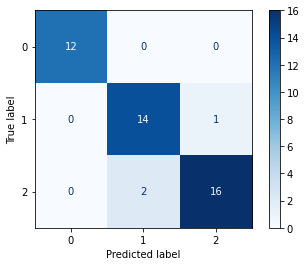

In [5]:
#Part I: Task 2
print(confusion_matrix(y_test, y_predict, labels=[0, 1,2])) # retrieve confusion matrix
plot_confusion_matrix(DTC, X_test, y_test, cmap=plt.cm.Blues) # plot confusion matrix

'''
[15  0  0]
[ 0 16  0]
[ 0  3 11]
out of 14 instances of class '2', 11 were correctly classified as '2'
we wrongly predicted 3 instances of class '2' as class '1' 
 
'''

In [6]:
#Part I: Task 3
print(classification_report(y_test, y_predict, target_names=['0', '1', '2'])) # retrieve classification report

'''
Accuracy is an overall measure of correct prediction, regardless of the class (positive or negative). 
The complement of accuracy is error rate or misclassification rate.

High recall implies that very few positives are misclassified as negatives. 
High precision implies very few negatives are misclassified as positives. 
There's a trade-off here. If model is partial towards positives, we'll end up with high recall but low precision. 
It model favours negatives, we'll end up with low recall and high precision.

High specificity, like high precision, implies that very few negatives are misclassified as positives.
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.93      0.90        15
           2       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



"\nAccuracy is an overall measure of correct prediction, regardless of the class (positive or negative). \nThe complement of accuracy is error rate or misclassification rate.\n\nHigh recall implies that very few positives are misclassified as negatives. \nHigh precision implies very few negatives are misclassified as positives. \nThere's a trade-off here. If model is partial towards positives, we'll end up with high recall but low precision. \nIt model favours negatives, we'll end up with low recall and high precision.\n\nHigh specificity, like high precision, implies that very few negatives are misclassified as positives.\n"

In [7]:
#PART II
#Import dataset 
mycar = pd.read_csv('car_evaluation.csv', header=None)

# view dimensions of dataset
print(mycar.shape)

# preview the dataframe
mycar.head()

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
'''
Rename column names: give proper column name 
'''
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
mycar.columns = col_names

#  preview the dataframe
print(mycar.head())
#Check the number of missing values
mycar.isnull().sum()

#mycar['class'].value_counts()  

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
#Task 1.1 Declare input and target variable and create the splits

X = mycar.drop(['class'], axis=1) #input/feature vector
y = mycar['class']#target

#Split data into separate training and test set 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [10]:
# Task 1.2 Feature Engineering 
    # encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


Model accuracy score with criterion gini index: 0.76


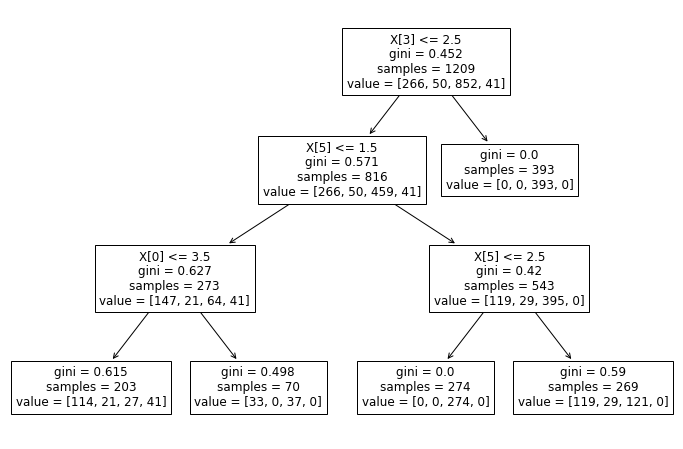

In [11]:
# Task 2.1: Decision Tree Classifier with criterion gini index 

mytree_gini = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

#Visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(mytree_gini.fit(X_train, y_train))

# Task 2.2 :fit the model and make prediction

mytree_gini.fit(X_train, y_train)
#Predict the Test set results with criterion gini index
y_pred_gini = mytree_gini.predict(X_test)

#Check accuracy score with criterion gini index
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

In [12]:
feature_importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(mytree_gini.feature_importances_,3)})
feature_importances = feature_importances.sort_values('Importance',ascending=False)
print(feature_importances)

    Feature  Importance
5    safety       0.597
3   persons       0.354
0    buying       0.049
1     maint       0.000
2     doors       0.000
4  lug_boot       0.000


In [320]:
'''
#Task 2.2: Visualize decision-trees with graphviz

dot_data = tree.export_graphviz(mytree_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

mygini_visgraph = graphviz.Source(dot_data) 
mygini_visgraph 

'''

'\n#Task 2.2: Visualize decision-trees with graphviz\n\ndot_data = tree.export_graphviz(mytree_gini, out_file=None, \n                              feature_names=X_train.columns,  \n                              class_names=y_train,  \n                              filled=True, rounded=True,  \n                              special_characters=True)\n\nmygini_visgraph = graphviz.Source(dot_data) \nmygini_visgraph \n\n'

In [321]:
#Task 2.3
#Create a datframe from 'actual set' and 'predicted' 
Actual_Predicted = {'y_Actual':    y_test,
                    'y_Predicted':  y_pred_gini}
    
df = pd.DataFrame(Actual_Predicted, columns=['y_Actual','y_Predicted'])
df

,y_Actual,y_Predicted
599,unacc,unacc
1201,acc,unacc
628,unacc,unacc
1498,acc,unacc
1263,unacc,unacc
...,...,...
490,unacc,unacc
1277,unacc,unacc
287,acc,unacc
1639,unacc,unacc


In [322]:
##Task 2.3 unique classes in actual test set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'acc': 118, 'good': 19, 'unacc': 358, 'vgood': 24}

In [323]:
##Task 2.3 unique classes in prediction
unique, counts = np.unique(y_pred_gini, return_counts=True)
dict(zip(unique, counts))

{'acc': 85, 'unacc': 434}

[[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


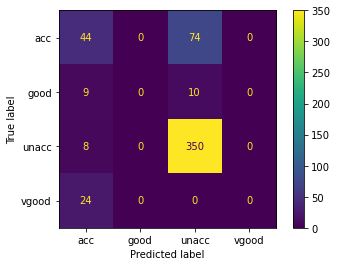

In [325]:
print(confusion_matrix(y_test,y_pred_gini))
plot_confusion_matrix(mytree_gini, X_test, y_test)

In [326]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.52      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.98      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.34      0.33       519
weighted avg       0.67      0.76      0.71       519



In [ ]:
"""
混淆矩阵的每一列代表了预测类别，每一列的总数表示预测为该类别的数据的数目；
每一行代表了数据的真实归属类别，每一行的数据总数表示该类别的数据实例的数目。
每一列中的数值表示真实数据被预测为该类的数目：第一行第一列中的43表示有43个实际归属第一类的实例被预测为第一类，
同理，第一行第二列的2表示有2个实际归属为第一类的实例被错误预测为第二类

如有150个样本数据，预测为1,2,3类各为50个。分类结束后得到的混淆矩阵为：
             预测
             类1    类2   类3
实际   类1   43     2     0
       类2   5      45    1
       类3   2      3     49
每一行之和表示该类别的真实样本数量，每一列之和表示被预测为该类别的样本数量，
第一行说明有43个属于第一类的样本被正确预测为了第一类，有两个属于第一类的样本被错误预测为了第二类"""